In [439]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [440]:
nx=200
ny=nx
#nt=100
v=3



xs=np.linspace(0,10,nx)
dt=np.diff(ts)[0]
h=np.diff(xs)[0]
C=1/4
dt=C*h/v
ts=np.arange(0,0.1,dt)
nt=len(ts)

X,Y=np.meshgrid(xs,xs)

In [441]:
nt

24

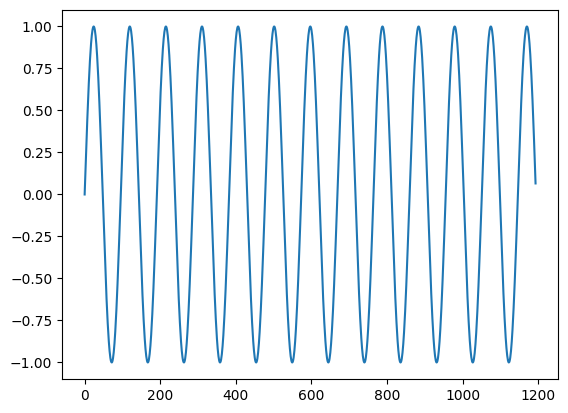

In [442]:
plt.plot(y)

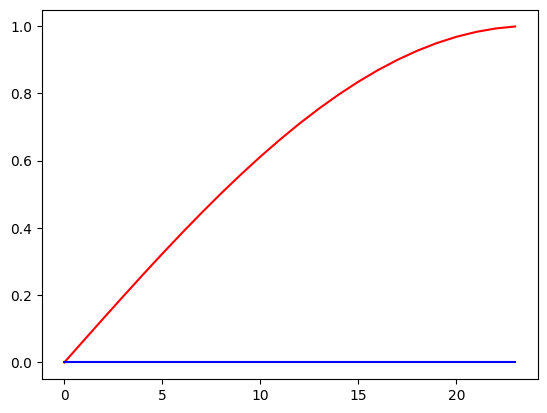

In [445]:
y=1*np.sin(5*np.pi*ts)
idx=np.where(y<0)
idx1=np.where(y>0)
y1=np.copy(y)
y2=np.abs(np.copy(y))
y1[idx]=0
y2[idx1]=0

plt.plot(y1,color='red')
plt.plot(y2,color='blue')
#plt.plot(np.abs(y),color='blue')

## Condiciones de frontera de dirichlett

In [446]:
c=np.zeros((nx,ny))
c[int(nx/2),int(nx/2)-20:int(nx/2)]=1
idx11=np.where(c>1)

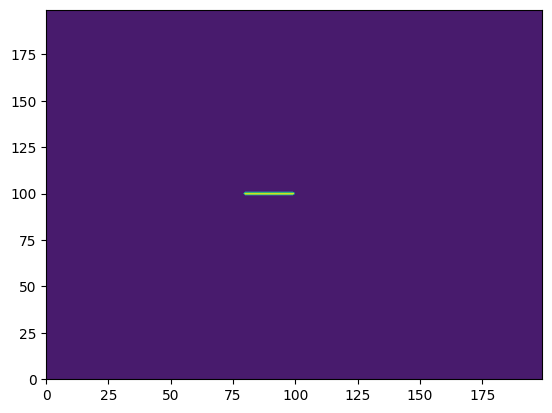

In [447]:
plt.contourf(c)

In [437]:
np.shape(np.zeros((nx,nx,nx,nt)))

(200, 200, 200, 24)

In [451]:

U=np.zeros((nx,ny,ny,nt))
rot=np.zeros((nx,ny,ny))
A=np.array([np.copy(U),np.copy(U),np.copy(U)])
lap=np.zeros((nx,ny,ny))
for i in range(1,nt-1):
    #Condiciones de frontera
    U[0,:,:,i]=0
    U[-1,:,:,i]=0
    U[:,0,:,i]=0
    U[:,-1,:,i]=0
    U[:,:,0,i]=0
    U[:,:,-1,i]=0
    
    U[int(nx/2)-1,int(nx/2),int(nx/2),i]=(dt**2)*1*y1[i]
    U[int(nx/2)+3,int(nx/2),int(nx/2),i]=(dt**2)*1*(y2[i])
    #laplacian=
    ##Diferencias finitas centradas
    #grad=np.gradient(U[:,:,i])
    #lap=np.array([np.gradient(grad[0])[0],np.gradient(grad[1])[1]])
    #for l in range(1,nx-1):
    #    lap=(U[k+1,:,i]-2*U[k,:,i]+U[k-1,:,i])+(U[k,j+1,i]-2*U[k,j,i]+U[k,j-1,i])
    for k in range(1,nx-1):
        for j in range(1,ny-1):
            for l in range(1,nx-1):
                lap[k,j,l]=(U[k+1,j,l,i]-2*U[k,j,l,i]+U[k-1,j,l,i])+(U[k,j+1,l,i]-2*U[k,j,l,i]+U[k,j-1,l,i])+(U[k,j,l+1,i]-2*U[k,j,l,i]+U[k,j,l-1,i])
            #lapA0[k,j,l]=(A[0][k+1,j,i]-2*A[0][k,j,i]+A[0][k-1,j,i])+(A[0][k,j+1,i]-2*A[0][k,j,i]+A[0][k,j-1,i])
            #lapA1[k,j,l]=(A[1][k+1,j,i]-2*A[1][k,j,i]+A[1][k-1,j,i])+(A[1][k,j+1,i]-2*A[1][k,j,i]+A[1][k,j-1,i])
            #lapA2[k,j,l]=(A[2][k+1,j,i]-2*A[2][k,j,i]+A[2][k-1,j,i])+(A[2][k,j+1,i]-2*A[2][k,j,i]+A[2][k,j-1,i])
            #rot[k,j]=
            #A[0][:,:,i][idx11]=-(1/h)*(U[k,j]-U[k-1,j])
            #A[1][:,:,i][idx11]=-(1/h)*(U[k,j]-U[k,j-1])
            #A[2][:,:,i][idx11]=-(1/h)*(U[k,j]-U[k-1,j])-A[] 
    U[:,:,:,i+1]=2*U[:,:,:,i]-U[:,:,:,i-1]+((C)**2)*lap
       
    
    #A[0][:,:,i+1]=2*A[0][:,:,i]-A[0][:,:,i-1]+((C)**2)*lapA0
    #A[1][:,:,i+1]=2*A[1][:,:,i]-A[1][:,:,i-1]+((C)**2)*lapA1
    #A[2][:,:,i+1]=2*A[2][:,:,i]-A[2][:,:,i-1]+((C)**2)*lapA2

In [407]:
nt

1194

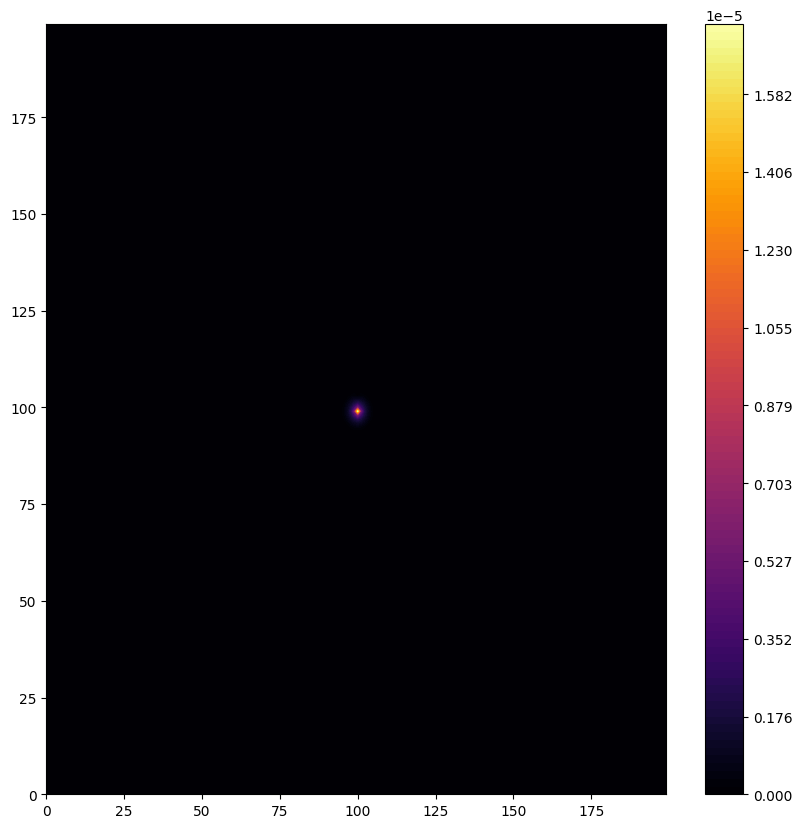

In [455]:
ax=plt.figure(figsize=(10,10)).add_subplot(111)
#ax.contour(X,Y,U[:,:,100])
SC=ax.contourf(U[:,:,int(nx/2),20], levels=np.linspace(np.min(U),np.max(U),100),cmap='inferno')
#plt.axis('equal')
plt.colorbar(SC)
plt.show()

In [420]:
ii=np.linspace(0,nt-1,200,dtype=int)

In [421]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
def animate(i):
    ax.clear()
    ax.contourf(U[0:nx-1:2,0:nx-1:2,i],levels=np.linspace(np.min(U),np.max(U),100),cmap='inferno')
    return fig

anim=FuncAnimation(fig,animate,frames=ii,interval=24)
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

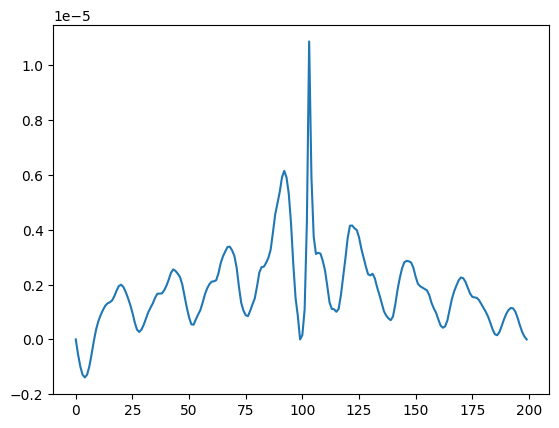

In [418]:
plt.plot(U[:,int(nx/2),440])

In [250]:
np.gradient([0,2,2,3,4])

array([2. , 1. , 0.5, 1. , 1. ])